This Notebook was ran on Google Colab

In [1]:
!nvidia-smi

Wed Oct  8 11:13:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Install dependencies

In [2]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 120.2 MB/s eta 0:00:00


## Imports

In [ ]:
from roboflow import Roboflow
from pathlib import Path
from IPython.display import Image, display
from google.colab import userdata, files

In [10]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Pull dataset

In [4]:
# Set your key: either via environment or paste it here
ROBOFLOW_API_KEY = userdata.get("ROBOFLOW_API_KEY")

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(20)
dataset = version.download("yolov11")

DATA_DIR = Path(dataset.location)
DATA_YAML = DATA_DIR / "data.yaml"

print("Dataset root:", DATA_DIR)
print("YAML:", DATA_YAML)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-20 in yolov11:: 100%|██████████| 756/756 [00:00<00:00, 8013.66it/s]

Dataset root: /content/football-players-detection-20
YAML: /content/football-players-detection-20/data.yaml


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.



## Custom training

In [5]:
!yolo detect train \
  model=yolo11l.pt \
  data="$DATA_YAML" \
  epochs=50 \
  imgsz=1024 \
  batch=-1 \
  workers=2 \
  amp=True \
  plots=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.206 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/football-players-detection-20/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=Fa

In [13]:
ls -la $HOME/runs/detect/train

total 7672
drwxr-xr-x 3 root root   4096 Oct  8 11:54 ./
drwxr-xr-x 3 root root   4096 Oct  8 11:20 ../
-rw-r--r-- 1 root root   1564 Oct  8 11:20 args.yaml
-rw-r--r-- 1 root root 202916 Oct  8 11:54 BoxF1_curve.png
-rw-r--r-- 1 root root 162488 Oct  8 11:54 BoxP_curve.png
-rw-r--r-- 1 root root 139780 Oct  8 11:54 BoxPR_curve.png
-rw-r--r-- 1 root root 177238 Oct  8 11:54 BoxR_curve.png
-rw-r--r-- 1 root root 155699 Oct  8 11:54 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 137812 Oct  8 11:54 confusion_matrix.png
-rw-r--r-- 1 root root 111947 Oct  8 11:20 labels.jpg
-rw-r--r-- 1 root root   6218 Oct  8 11:54 results.csv
-rw-r--r-- 1 root root 299608 Oct  8 11:55 results.png
-rw-r--r-- 1 root root 463440 Oct  8 11:20 train_batch0.jpg
-rw-r--r-- 1 root root 505797 Oct  8 11:20 train_batch1.jpg
-rw-r--r-- 1 root root 422337 Oct  8 11:20 train_batch2.jpg
-rw-r--r-- 1 root root 404917 Oct  8 11:48 train_batch3000.jpg
-rw-r--r-- 1 root root 394880 Oct  8 11:48 train_batch3001.jpg


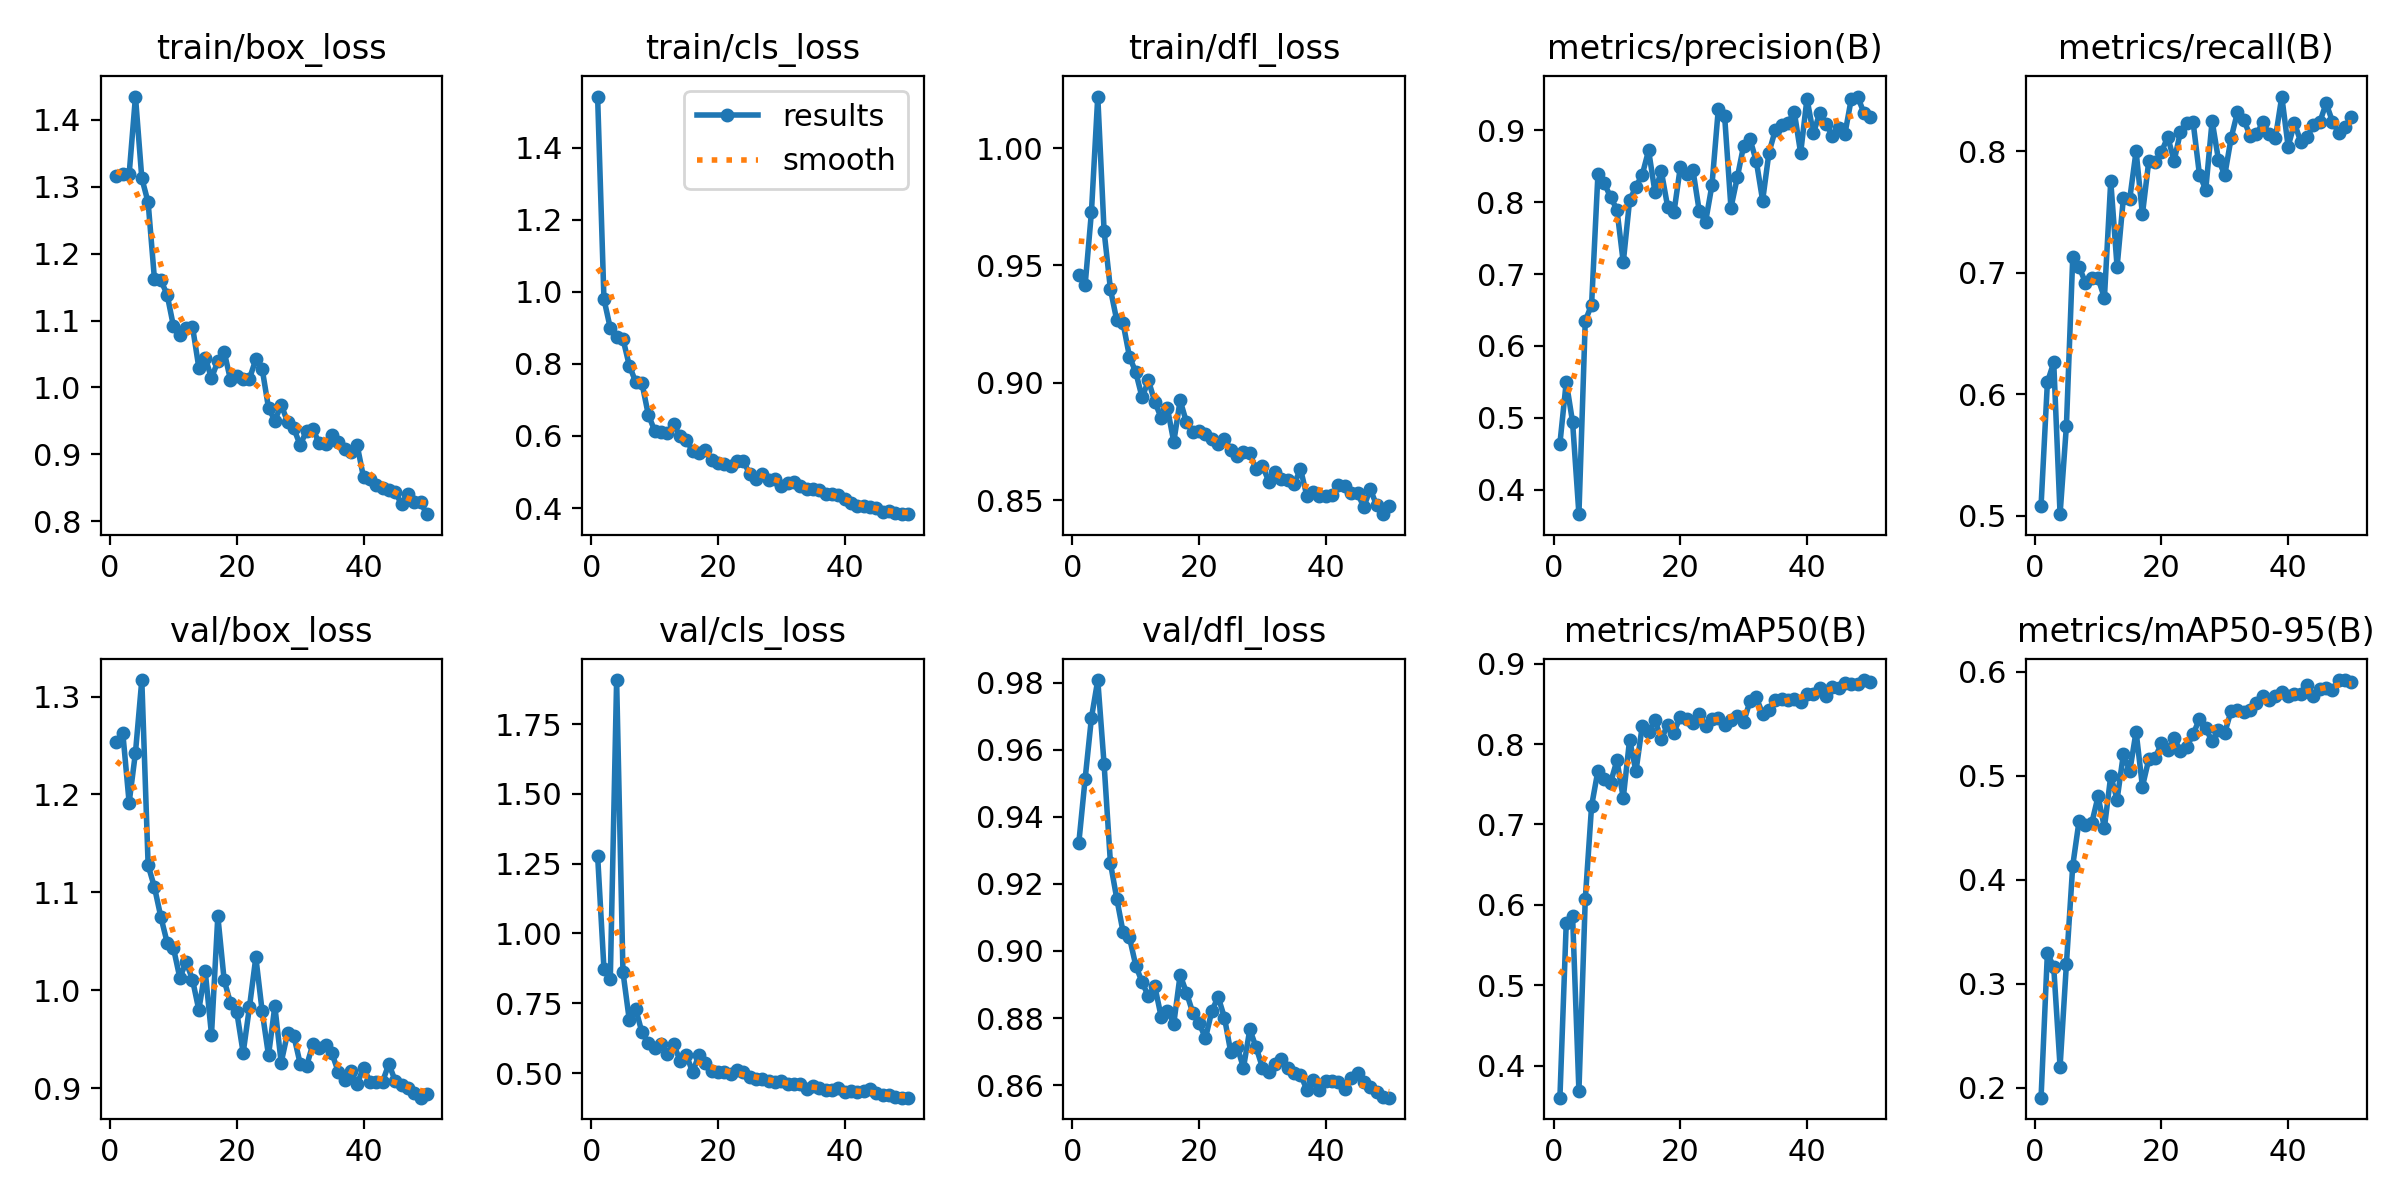

In [ ]:
display(Image(filename=f"{HOME}/runs/detect/train/results.png", width=600))

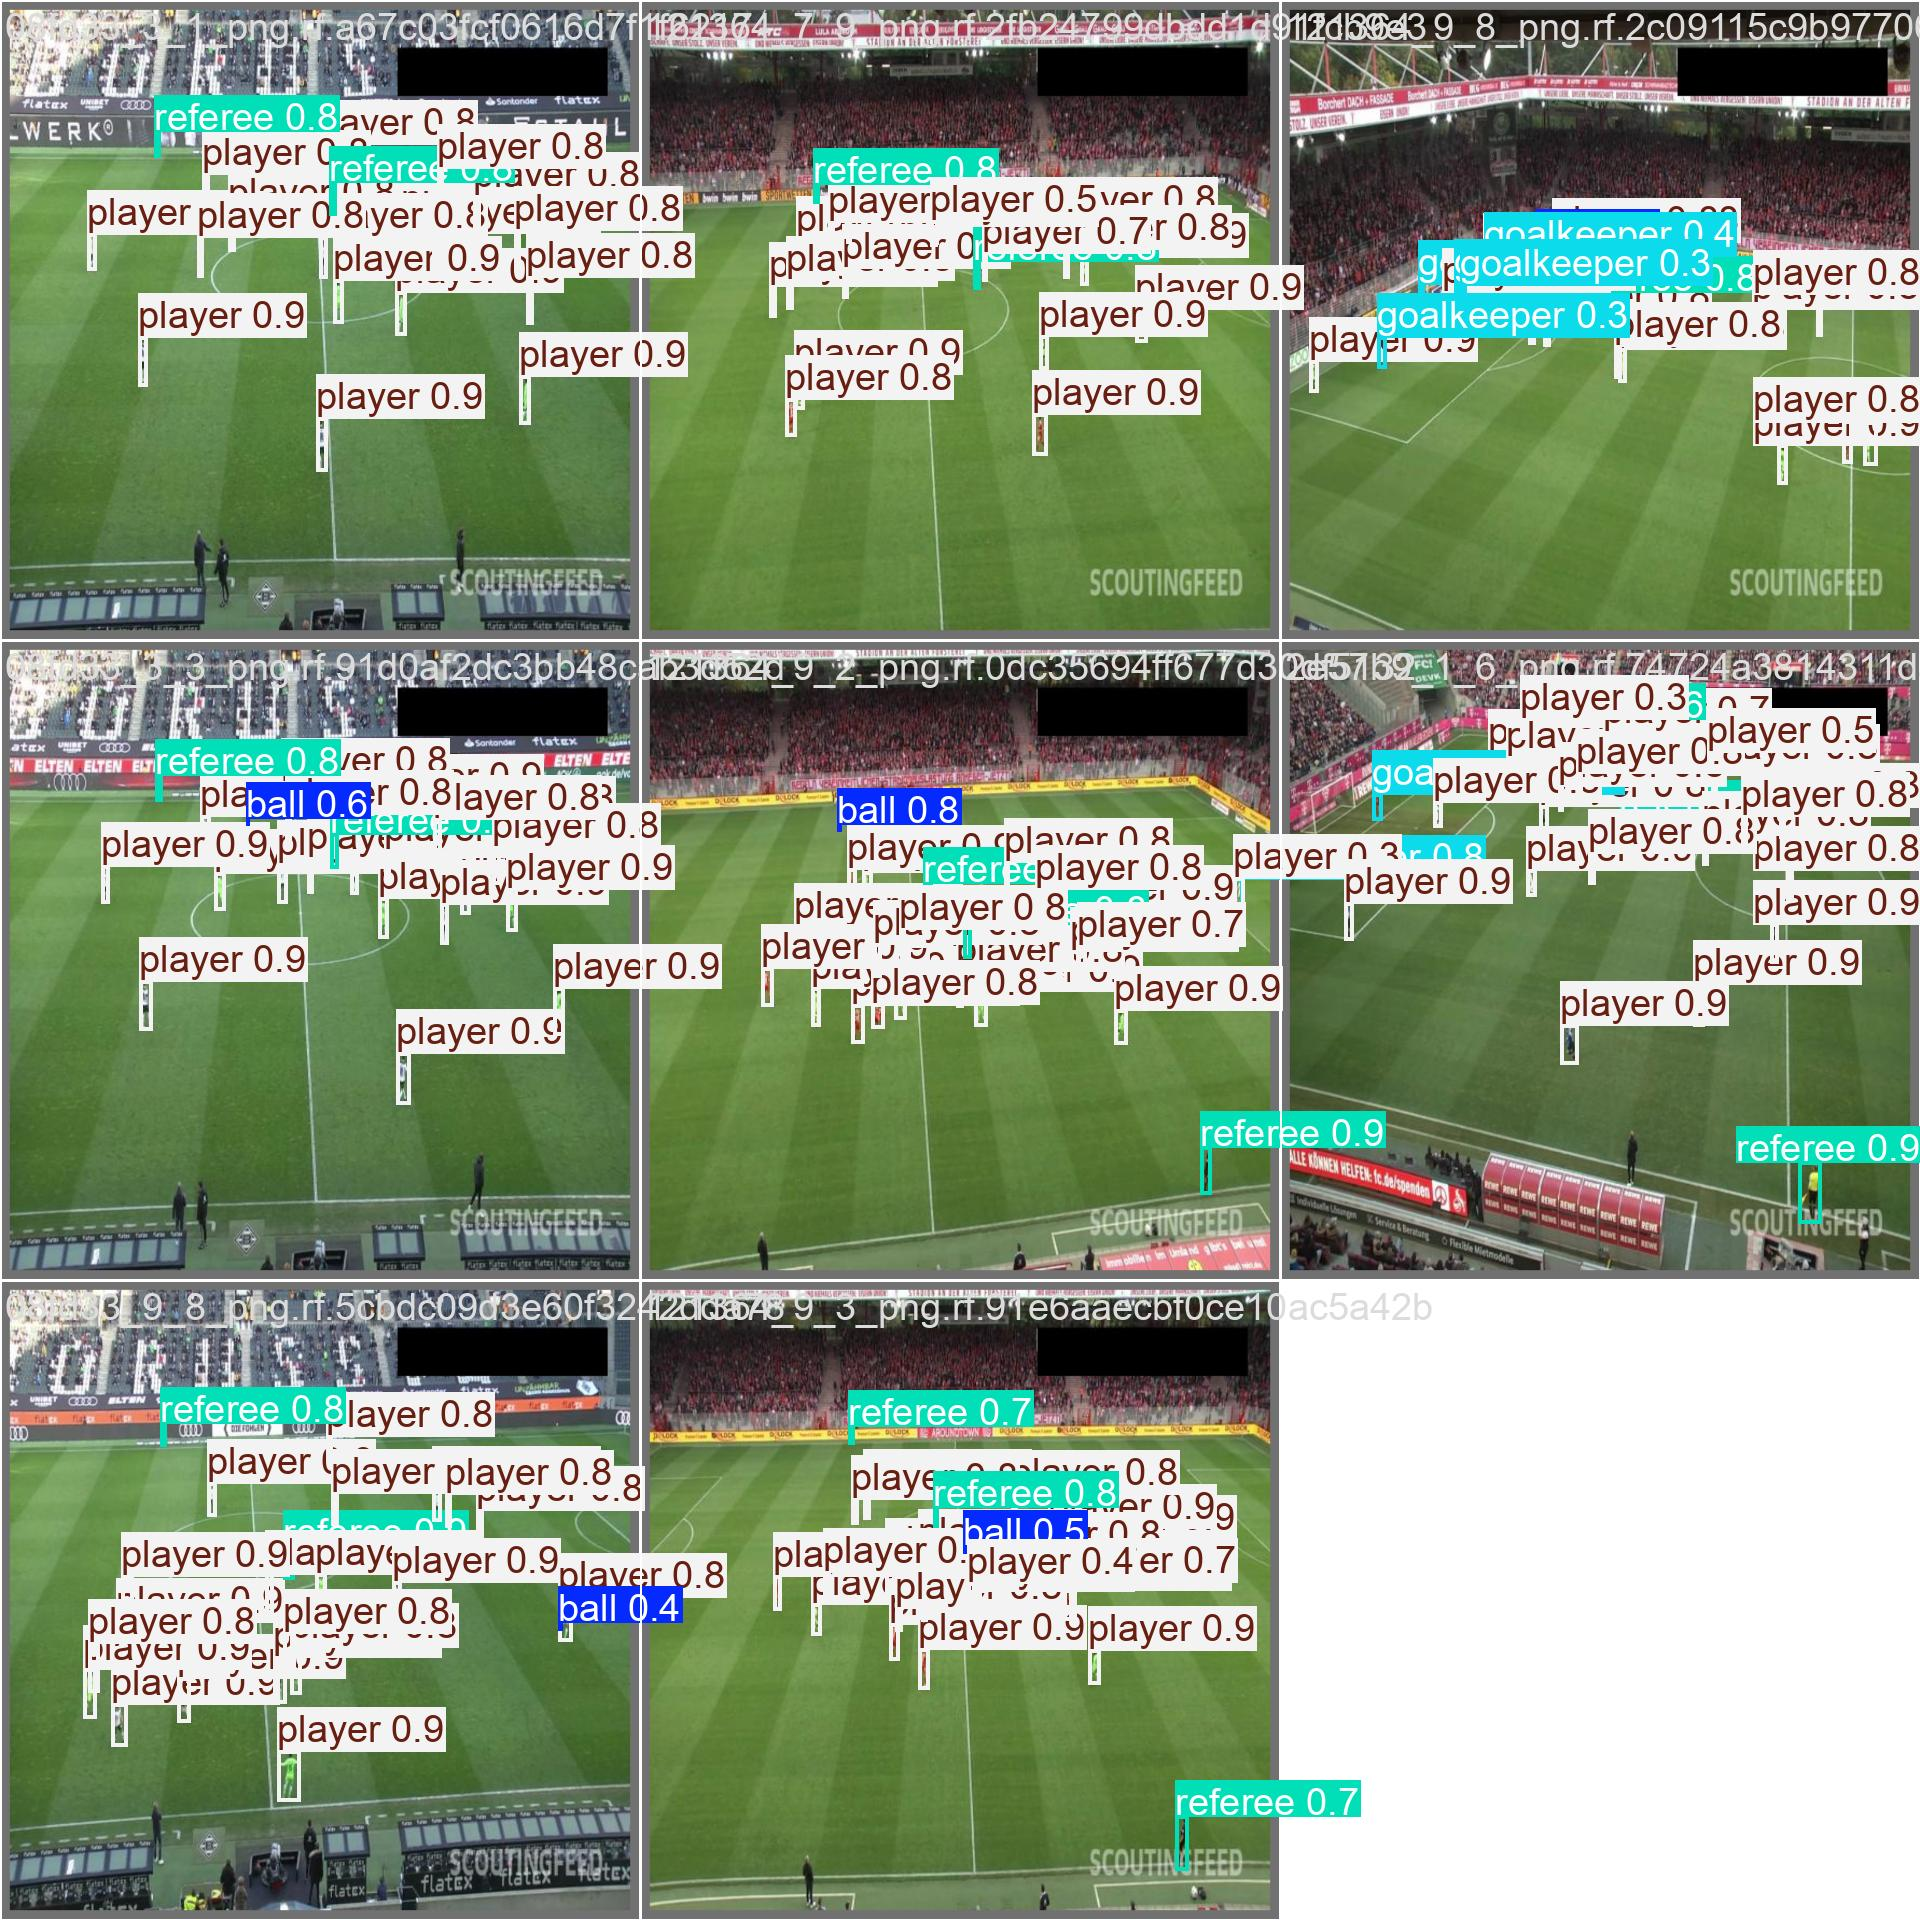

In [12]:
display(Image(filename=f"{HOME}/runs/detect/train/val_batch0_pred.jpg", width=600))

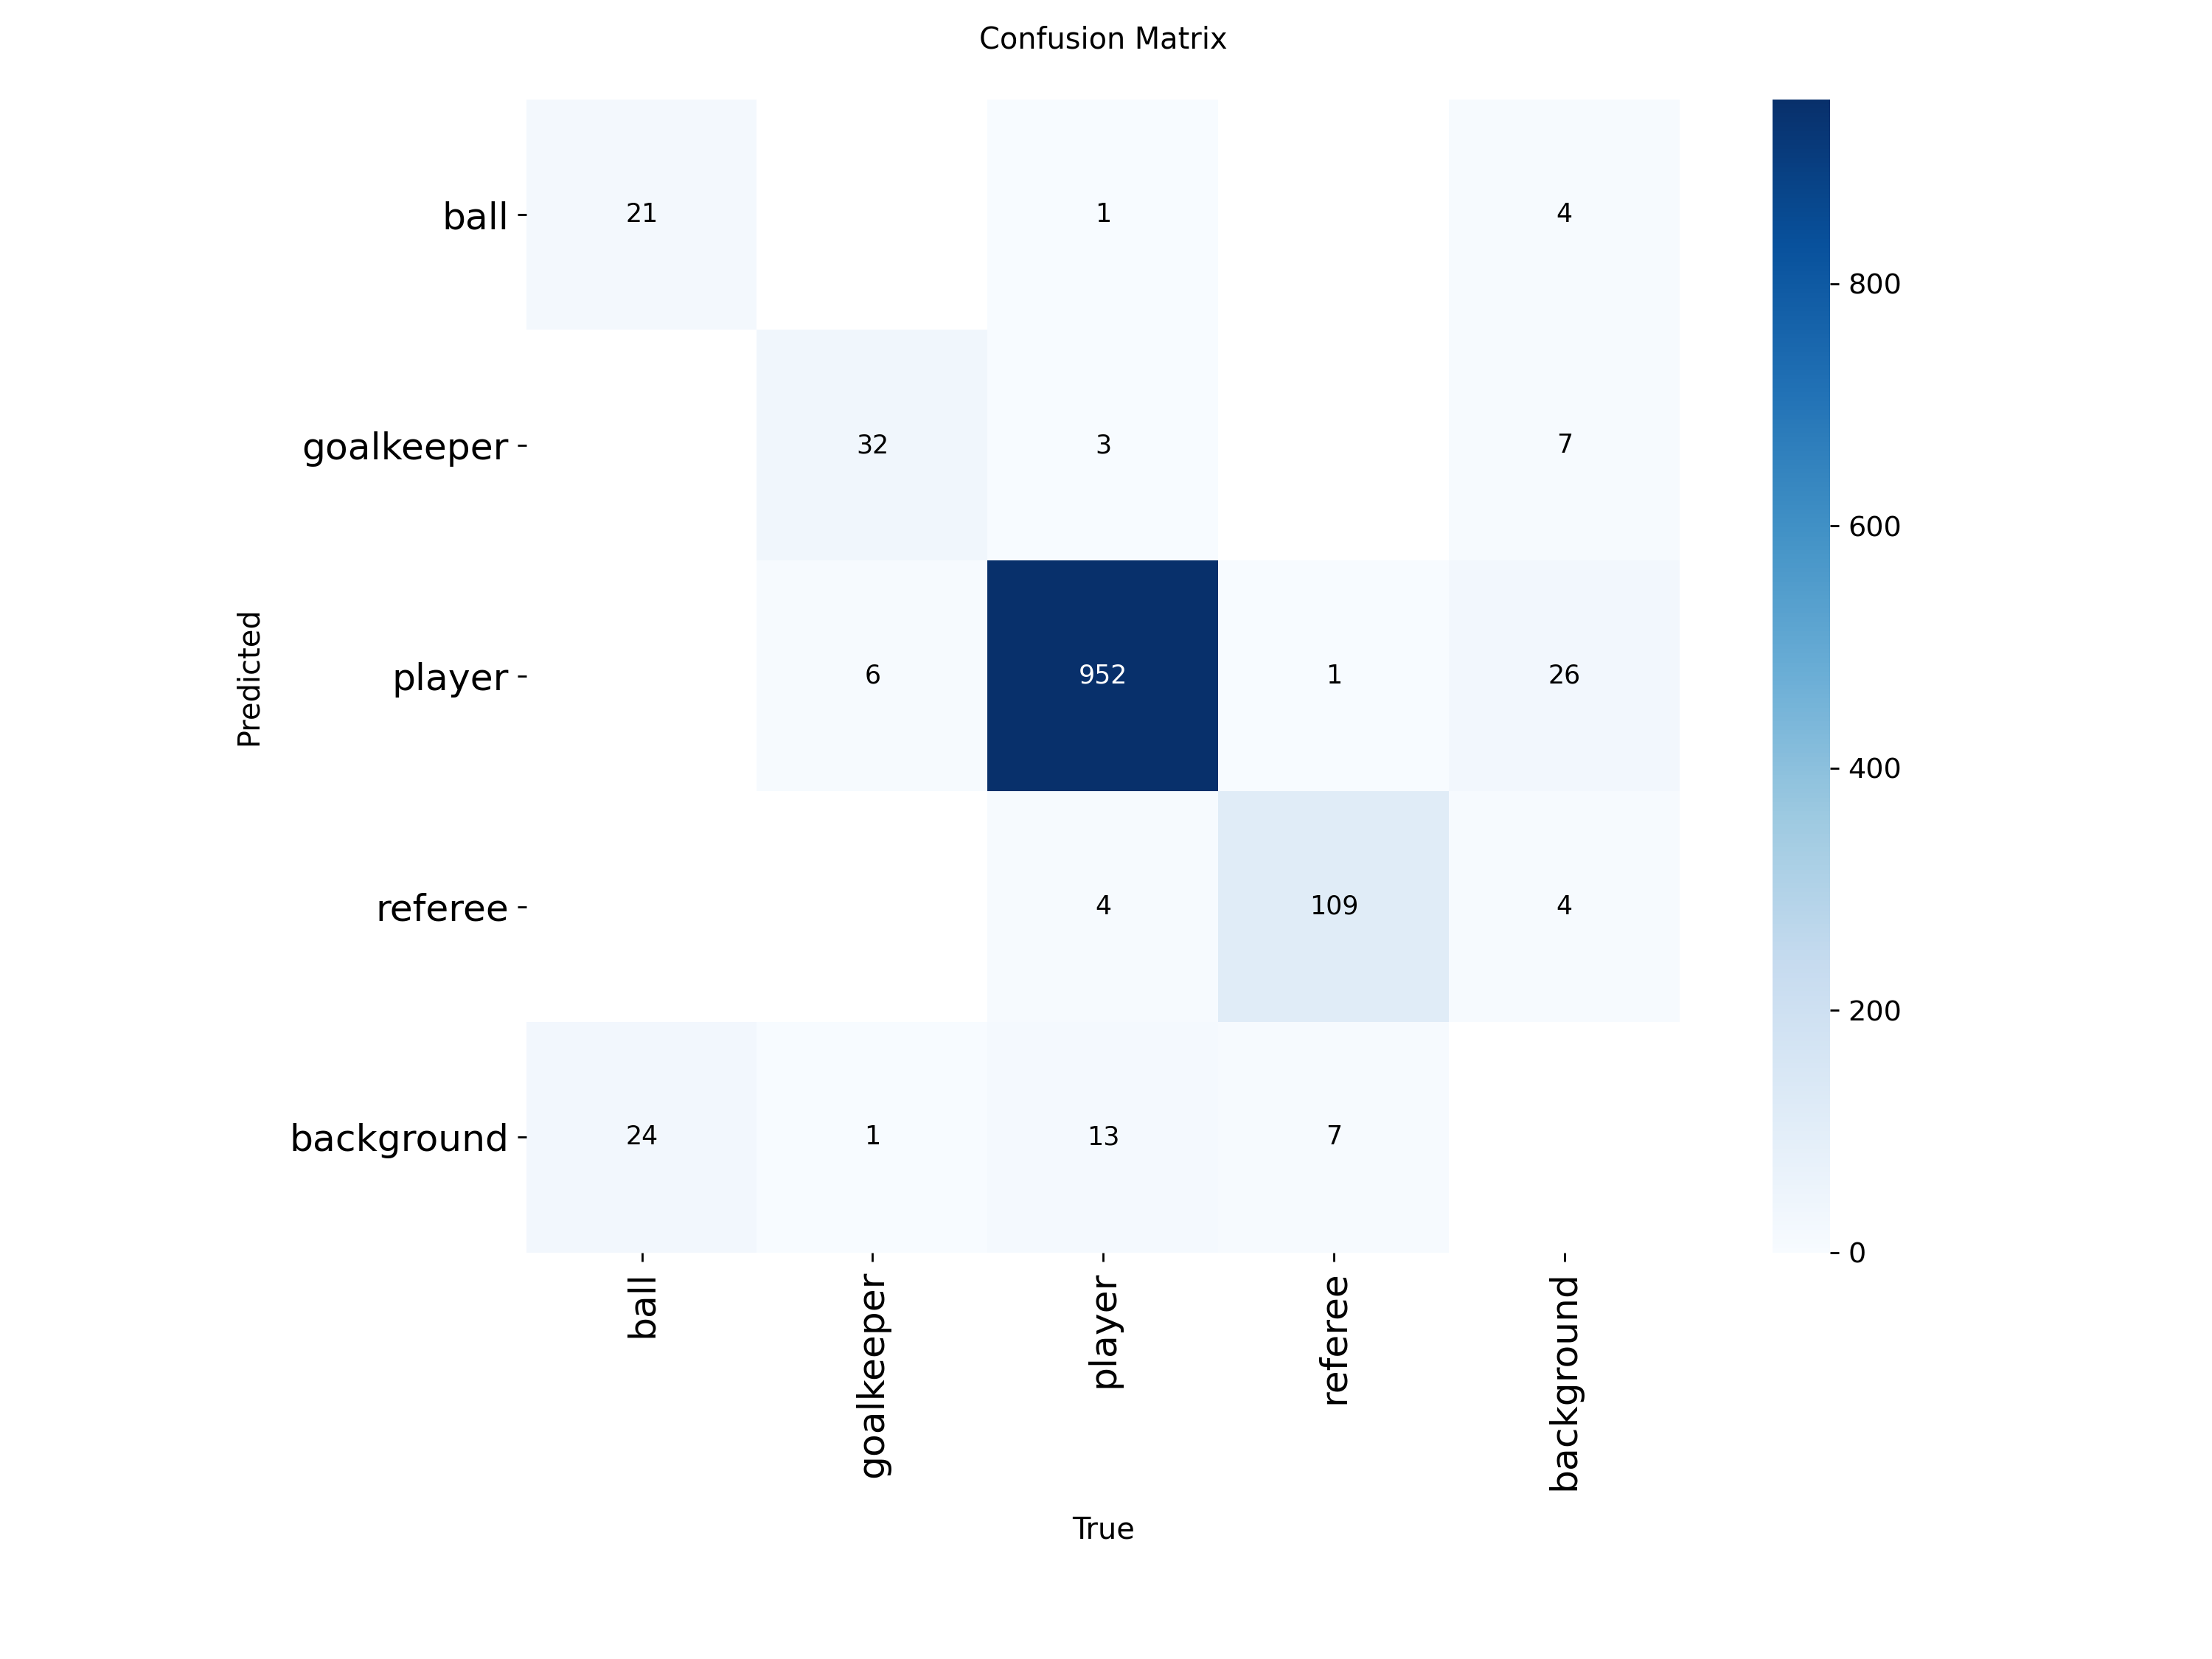

In [16]:
display(Image(filename=f"{HOME}/runs/detect/train/confusion_matrix.png", width=600))

## Validate custom model

In [17]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml imgsz=1280

Ultralytics 8.3.206 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,282,396 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1181.7±414.9 MB/s, size: 49.4 KB)
val: Scanning /content/football-players-detection-20/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 49/49 665.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.5it/s 8.2s
                   all         49       1174      0.884      0.873      0.893      0.616
                  ball         45         45      0.772      0.622      0.637      0.312
            goalkeeper         38         39      0.878      0.919      0.968      0.708
                player         49        973       0.97      0.987      0.993      0.778
               referee         49        117      0.916      0.966      0.975      0.666
Speed: 21.5ms preprocess, 

## Deploy model on Roboflow

In [ ]:
files.download(f"{HOME}/runs/detect/train/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>